In [19]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import seaborn as sns

In [20]:
with open("dataset.pkl", "rb") as f:
    DATA = pickle.load(f)
    pheno = DATA["pheno"]
    X_gpa = DATA["X_gpa"]
    X_snps = DATA["X_snps"]
    X_genexp = StandardScaler().fit_transform(DATA["X_genexp"])
y = pheno.iloc[:, 1]
mask = np.isfinite(y)
X_gpa = X_gpa[mask]
X_snps = X_snps[mask]
X_genexp = X_genexp[mask]
y = y[mask].astype(int)

In [21]:
kpca = KernelPCA()

In [22]:
X = kpca.fit_transform(X_gpa)
exp_var = kpca.eigenvalues_ / sum(kpca.eigenvalues_)
df = pd.DataFrame({"Variance cumulée [%]": np.cumsum(exp_var),
                   "PC": np.arange(1, len(exp_var) + 1),
                   "X": "gpa"})

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

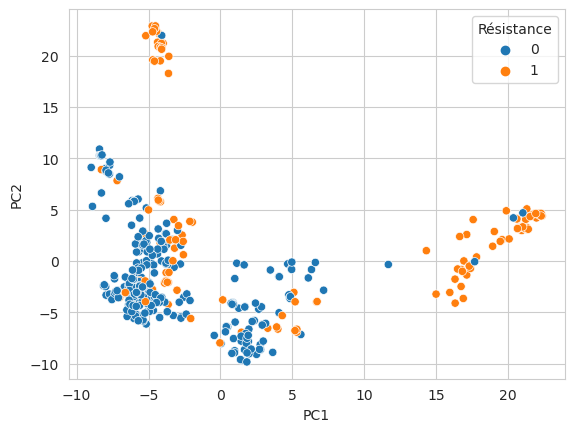

In [23]:
sns.scatterplot(data=pd.DataFrame({"PC1": X[:, 0], "PC2": X[:, 1],
                                   "Résistance": y}),
                x="PC1", y="PC2", hue="Résistance")

In [24]:
X = kpca.fit_transform(X_snps)
exp_var = kpca.eigenvalues_ / sum(kpca.eigenvalues_)
df = pd.concat([df, pd.DataFrame({"Variance cumulée [%]": np.cumsum(exp_var),
                                  "PC": np.arange(1, len(exp_var) + 1),
                                  "X": "snps"})], ignore_index=True)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

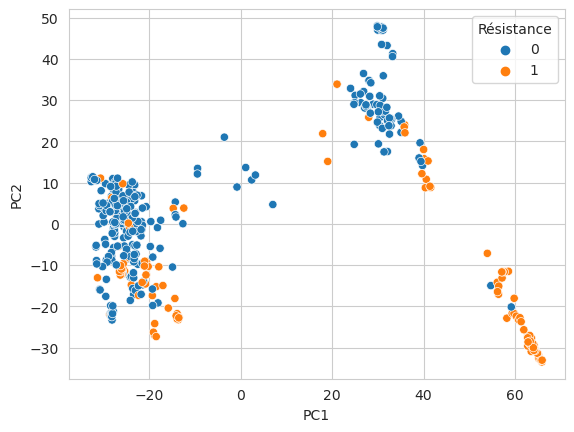

In [25]:
sns.scatterplot(data=pd.DataFrame({"PC1": X[:, 0], "PC2": X[:, 1],
                                   "Résistance": y}),
                x="PC1", y="PC2", hue="Résistance")

In [26]:
X = kpca.fit_transform(X_genexp)
exp_var = kpca.eigenvalues_ / sum(kpca.eigenvalues_)
df = pd.concat([df, pd.DataFrame({"Variance cumulée [%]": np.cumsum(exp_var),
                                  "PC": np.arange(1, len(exp_var) + 1),
                                  "X": "genexp"})], ignore_index=True)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

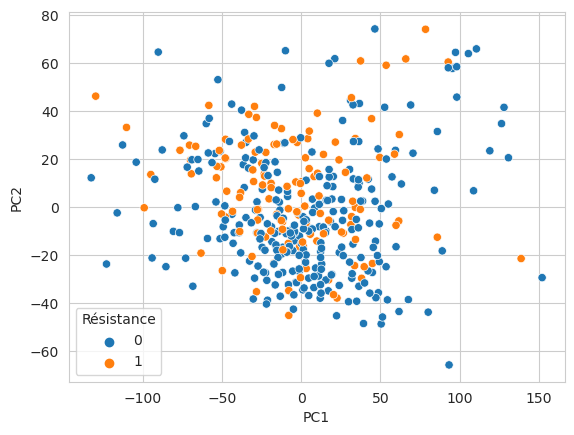

In [27]:
sns.scatterplot(data=pd.DataFrame({"PC1": X[:, 0], "PC2": X[:, 1],
                                   "Résistance": y}),
                x="PC1", y="PC2", hue="Résistance")

In [28]:
X = kpca.fit_transform(np.concatenate([X_gpa, X_snps], axis=-1))
exp_var = kpca.eigenvalues_ / sum(kpca.eigenvalues_)
df = pd.concat([df, pd.DataFrame({"Variance cumulée [%]": np.cumsum(exp_var),
                                  "PC": np.arange(1, len(exp_var) + 1),
                                  "X": "gpa+snps"})], ignore_index=True)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

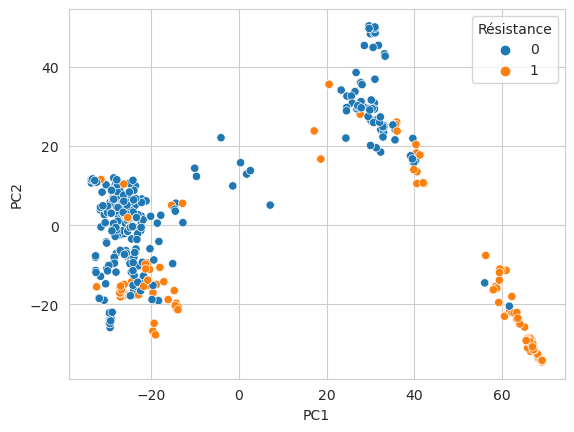

In [29]:
sns.scatterplot(data=pd.DataFrame({"PC1": X[:, 0], "PC2": X[:, 1],
                                   "Résistance": y}),
                x="PC1", y="PC2", hue="Résistance")

In [30]:
X = kpca.fit_transform(np.concatenate([X_gpa, X_genexp], axis=-1))
exp_var = kpca.eigenvalues_ / sum(kpca.eigenvalues_)
df = pd.concat([df, pd.DataFrame({"Variance cumulée [%]": np.cumsum(exp_var),
                                  "PC": np.arange(1, len(exp_var) + 1),
                                  "X": "gpa+genexp"})], ignore_index=True)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

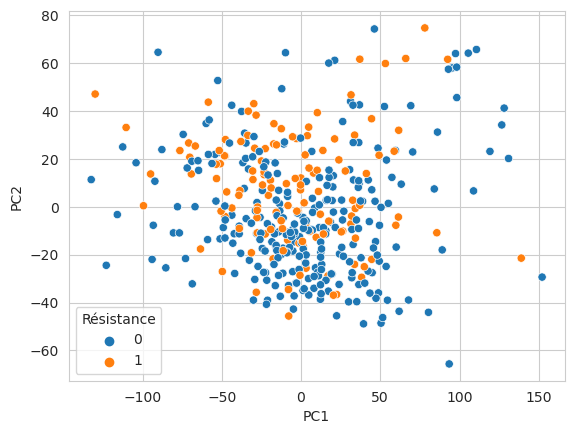

In [31]:
sns.scatterplot(data=pd.DataFrame({"PC1": X[:, 0], "PC2": X[:, 1],
                                   "Résistance": y}),
                x="PC1", y="PC2", hue="Résistance")

In [32]:
X = kpca.fit_transform(np.concatenate([X_snps, X_genexp], axis=-1))
exp_var = kpca.eigenvalues_ / sum(kpca.eigenvalues_)
df = pd.concat([df, pd.DataFrame({"Variance cumulée [%]": np.cumsum(exp_var),
                                  "PC": np.arange(1, len(exp_var) + 1),
                                  "X": "snps+genexp"})], ignore_index=True)

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

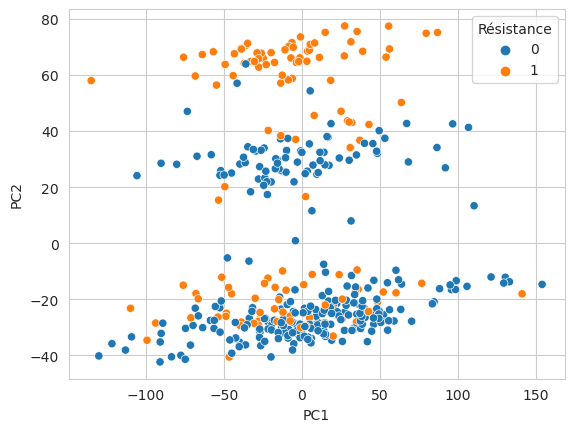

In [33]:
sns.scatterplot(data=pd.DataFrame({"PC1": X[:, 0], "PC2": X[:, 1],
                                   "Résistance": y}),
                x="PC1", y="PC2", hue="Résistance")

In [34]:
X = kpca.fit_transform(np.concatenate([X_gpa, X_snps, X_genexp], axis=-1))
exp_var = kpca.eigenvalues_ / sum(kpca.eigenvalues_)
df = pd.concat([df, pd.DataFrame({"Variance cumulée [%]": np.cumsum(exp_var),
                                  "PC": np.arange(1, len(exp_var) + 1),
                                  "X": "gpa+snps+genexp"})], ignore_index=True)

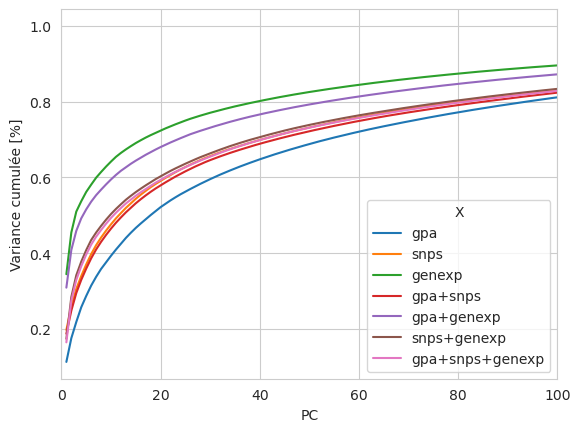

In [35]:
g = sns.lineplot(data=df,
                 x="PC", y="Variance cumulée [%]", hue="X")
g.set(xlim=(0, 100))
plt.savefig("rapport/images/pca_var.png", dpi=300, bbox_inches="tight")

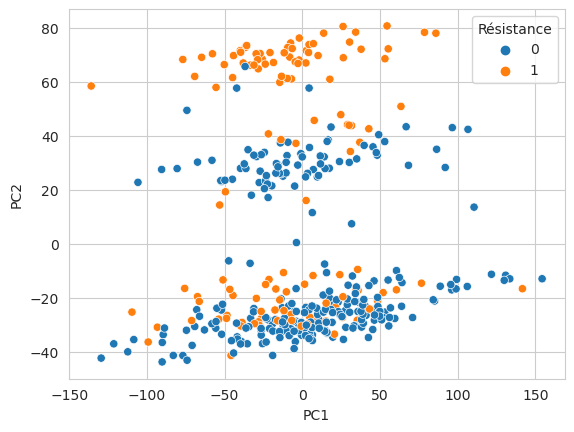

In [36]:
sns.scatterplot(data=pd.DataFrame({"PC1": X[:, 0], "PC2": X[:, 1],
                                   "Résistance": y}),
                x="PC1", y="PC2", hue="Résistance")
plt.savefig("rapport/images/pca.png", dpi=300, bbox_inches="tight")